In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('Financial_Analysis.csv')
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [4]:
df.shape

(5842, 2)

In [5]:
df['Sentence'].value_counts()

Sentence
Managing Director 's comments : `` Net sales for the first quarter were notably lower than a year before , especially in Finland , Russia and the Baltic countries .                                                          2
Scanfil , a systems supplier and contract manufacturer to the communications sector , will give notice to 20 productional employees , and temporarily lay off 15 employees at the company 's plant in Sievi , in Finland .    2
Profit before taxes decreased to EUR 31.6 mn from EUR 50.0 mn the year before .                                                                                                                                               2
Pretax loss totalled EUR 49.9 mn , compared to a loss of EUR 15.4 mn in the corresponding period in 2008 .                                                                                                                    2
Operating loss of the Pulp & Paper Machinery unit was over EUR 3mn in September 2007 - August 2

In [6]:
df['Sentiment'].value_counts()

Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64

In [7]:
df['Sentiment'].nunique()

3

In [8]:
df['Sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [9]:
print(df.isnull().sum())  # Check for NaN values


Sentence     0
Sentiment    0
dtype: int64


In [10]:
df['Sentence'] = df['Sentence'].fillna("")

<Axes: xlabel='Sentiment', ylabel='count'>

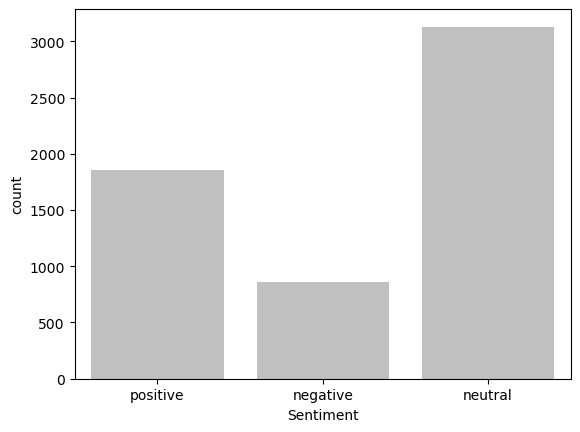

In [11]:
sns.countplot(data=df, x='Sentiment',color='silver')

In [12]:
df.shape

(5842, 2)

In [13]:
import nltk

**Text Cleaning

In [14]:
import nltk 
import re
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [15]:
corpus=[]
for i in range(len(df)):
    rp = re.sub('[^a-zA-Z]'," ",df['Sentence'][i])
    rp = rp.lower ()
    rp = rp.split()
    rp = [ps.stem(word) for word in rp if not word in set(stopwords.words('english'))]
    rp = " ".join (rp)
    corpus. append (rp)

**Vectorization

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer ()
X  = pd.DataFrame(cv.fit_transform(corpus).toarray())

In [17]:
X

,0,1,2,3,4,5,6,7,8,9,...,7766,7767,7768,7769,7770,7771,7772,7773,7774,7775
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer ()
X  = cv.fit_transform(corpus).toarray()

In [19]:
df['Sentiment'].replace({'positive':0 , 'negative':1, 'neutral':-1},inplace=True)

In [20]:
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,0
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",1
2,"For the last quarter of 2010 , Componenta 's n...",0
3,According to the Finnish-Russian Chamber of Co...,-1
4,The Swedish buyout firm has sold its remaining...,-1
...,...,...
5837,RISING costs have forced packaging producer Hu...,1
5838,Nordic Walking was first used as a summer trai...,-1
5839,"According shipping company Viking Line , the E...",-1
5840,"In the building and home improvement trade , s...",-1


In [21]:
y=df['Sentiment']

In [22]:
y.shape

(5842,)

**Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [24]:
X_train, X_test,y_train,y_test

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 406    -1
 450    -1
 32      0
 1855   -1
 2350   -1
        ..
 4931   -1
 3264   -1
 1653   -1
 2607   -1
 2732    0
 Name: Sentiment, Length: 4089, dtype: int64,
 2027    0
 1160   -1
 4769    0
 1511    0
 4800    0
        ..
 5565   -1
 1824   -1
 3213    0
 2385   -1
 4362    0
 Name: Sentiment, Length: 1753, dtype: int64)

**Modelling
**Navie Bayes Classifier with default parameters

In [25]:
y_train = y_train.values.flatten()

In [26]:
print(X_train.shape)  
print(y_train.shape)  


(4089, 7776)
(4089,)


In [27]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("After splitting:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X shape: (5842, 7776)
y shape: (5842,)
After splitting:
X_train shape: (4673, 7776)
y_train shape: (4673,)


In [28]:
#Check the size of X_train

print(len(X_train))  

# Check the size of y_train

print(len(y_train))  


4673
4673


In [29]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [30]:
ypred_test = model.predict(X_test)
ypred_train = model.predict(X_train)

**Evaluation

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
print("Train Accuracy:", accuracy_score(y_train,ypred_train))
print('Cross Validation Score:',cross_val_score(model,X_train,y_train,cv=5).mean())
print("Test Accuracy:", accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8191739781724802
Cross Validation Score: 0.6802887929553757
Test Accuracy: 0.6937553464499572


**Predict on new data

In [32]:
input_message ='The GeoSolutions technology will leverage Benefons GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model'

In [33]:
df_test = pd.DataFrame({'Sentence':input_message},index=[0])
df_test

,Sentence
0,The GeoSolutions technology will leverage Bene...


In [34]:
corpus=[]
for i in range(len(df_test)):
    rp = re.sub('[^a-zA-Z]'," ",df_test['Sentence'][i])
    rp = rp.lower ()
    rp = rp.split()
    rp = [ps.stem(word) for word in rp if not word in set(stopwords.words('english'))]
    rp = " ".join (rp)
    corpus. append (rp)
    
X = cv.transform(corpus).toarray()

In [35]:
pred = model.predict(X_test)

if pred[0] == 0:  # Assuming 0 is for positive sentiment
    print('positive')
elif pred[1] == 1:  # Assuming 1 is for negative sentiment
    print('negative')
else:
    print('neutral')  # Assuming there is no reaction

neutral
